In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

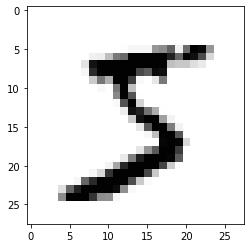

In [6]:
plt.imshow(X_train[0],cmap="Greys")

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_train.shape

(60000,)

In [9]:
y_example = to_categorical(y_train)

In [10]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [11]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [16]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu",kernel_initializer="he_normal"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu",kernel_initializer="he_normal"))

model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor="val_loss",patience=1)

In [19]:
model_history = model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1262 - accuracy: 0.9615 - val_loss: 0.0755 - val_accuracy: 0.9759
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0442 - accuracy: 0.9862 - val_loss: 0.0492 - val_accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.0438 - val_accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0447 - val_accuracy: 0.9865


In [20]:
metrics = pd.DataFrame(model_history.history)

In [21]:
metrics.head()

loss  accuracy  val_loss  val_accuracy
0  0.126202  0.961467  0.075505        0.9759
1  0.044227  0.986200  0.049196        0.9841
2  0.026490  0.991633  0.043792        0.9859
3  0.018597  0.993783  0.044698        0.9865

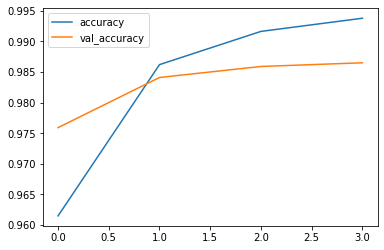

In [22]:
metrics[["accuracy","val_accuracy"]].plot()

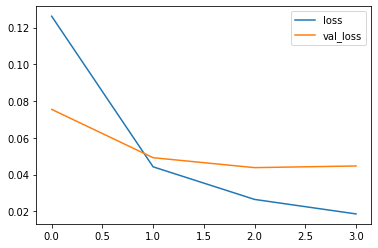

In [23]:
metrics[["loss","val_loss"]].plot()

In [24]:
 model.evaluate(X_test,y_cat_test,verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0447 - accuracy: 0.9865


[0.04469809681177139, 0.9865000247955322]

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [27]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [29]:
print(confusion_matrix(y_test,predictions))

[[ 971    1    1    0    0    0    3    2    0    2]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   2    3 1017    6    0    0    1    3    0    0]
 [   0    0    2 1003    0    2    0    2    1    0]
 [   0    0    0    0  973    0    2    0    2    5]
 [   1    0    1    6    0  876    7    0    1    0]
 [   3    3    1    0    1    1  949    0    0    0]
 [   0    1    5    1    4    0    0 1014    1    2]
 [   6    1    5    1    2    1    2    4  951    1]
 [   3    4    0    3   12    2    0    5    2  978]]


In [31]:
my_num = X_test[0]

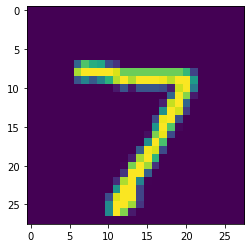

In [32]:
plt.imshow(my_num.reshape(28,28))

In [33]:
model.predict_classes(my_num.reshape(1,28,28,1))

array([7])